# (MBTI) Myers-Briggs Personality Type Prediction


* Extroversion vs. Introversion
    * I - 0
    * E - 1 
    
* Sensing vs. Intuition 
    * N - 0 
    * S - 1
    
* Thinking vs. Feeling
    * F - 0
    * T - 1
    
* Judging vs. Perceiving
    * P - 0
    * J - 1 

In [1]:
# importing dependencies here
import numpy as np
import pandas as pd

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# feature engineering
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
nltk.download("vader_lexicon")

# sentiment scoring
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# scikit
# vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# scaling to handle negative values (for Naive Bayes)
from sklearn.preprocessing import MinMaxScaler

# data stratifying and splitting
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# algorithms/models
# from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# model performance evaluation and selection
from sklearn.metrics import (
    classification_report,
    f1_score,
    accuracy_score,
    roc_auc_score,
)

# performance check
import time
import warnings

warnings.filterwarnings("ignore")

# sparse to dense
from sklearn.base import TransformerMixin


class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# code formatter
%load_ext nb_black

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<IPython.core.display.Javascript object>

### Visualizations

In [2]:
# reading the dataset from step 3
personality_data = pd.read_csv("data_ekta/clean_data_3.csv")

<IPython.core.display.Javascript object>

#### Word Clouds

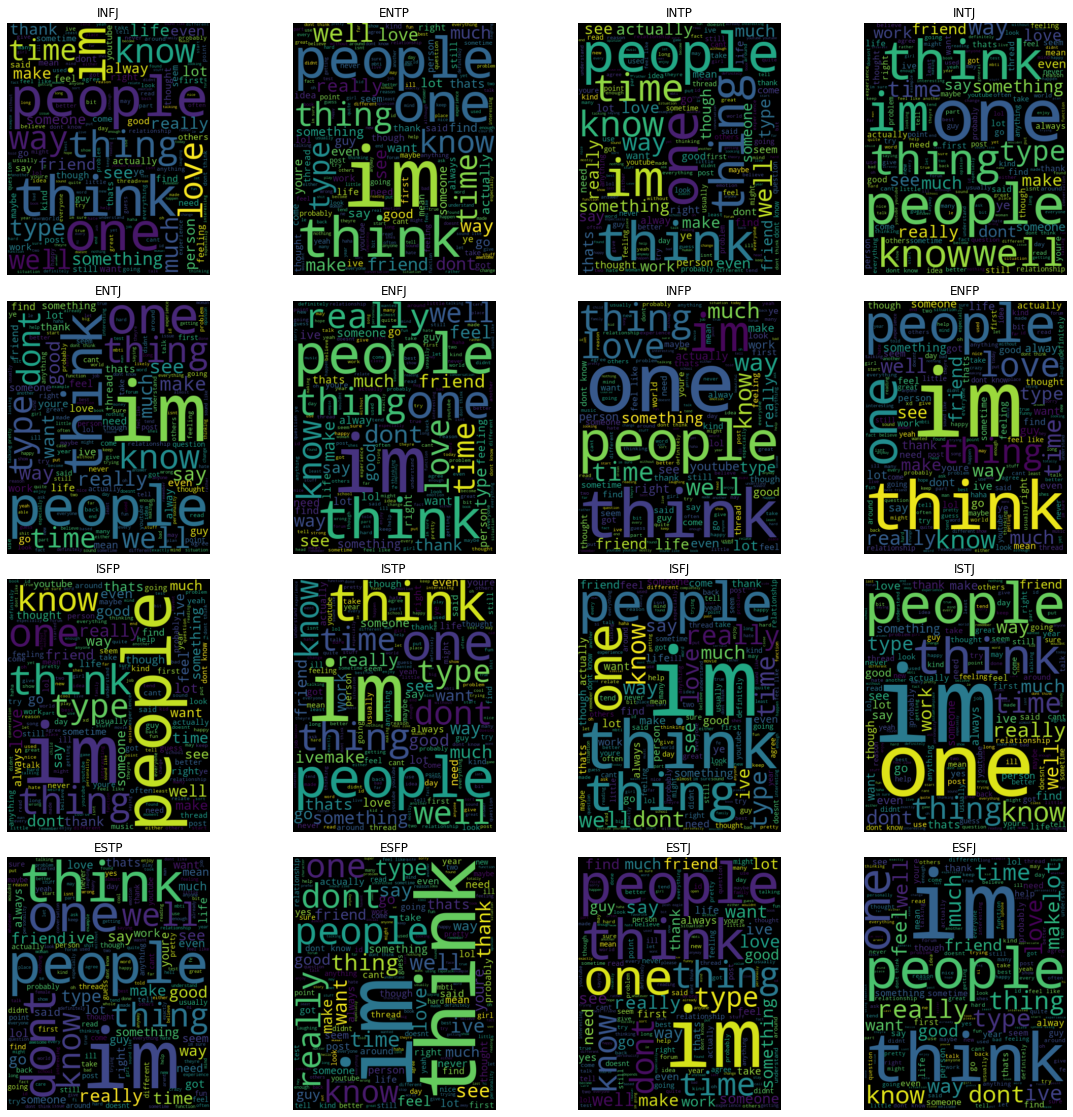

<IPython.core.display.Javascript object>

In [3]:
from wordcloud import WordCloud

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax.ravel()

for i, mbti_type in enumerate(personality_data["type"].unique()):
    wordcloud_words = " ".join(
        personality_data[personality_data["type"] == mbti_type]["clean_posts"]
    )
    wordcloud = WordCloud(height=500).generate(wordcloud_words)
    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(mbti_type)

#### Word Count by Type

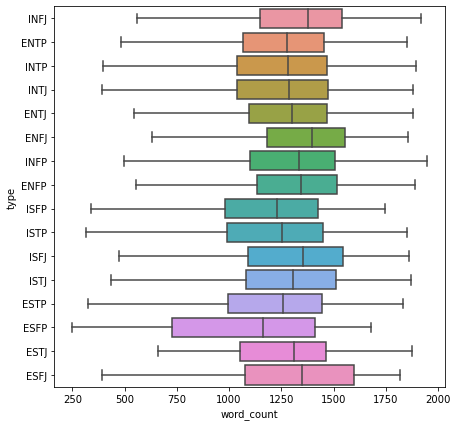

<IPython.core.display.Javascript object>

In [4]:
# boxplot of word counts
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="word_count", data=personality_data, showfliers=False)

#### Compound Sentiment Score by Type

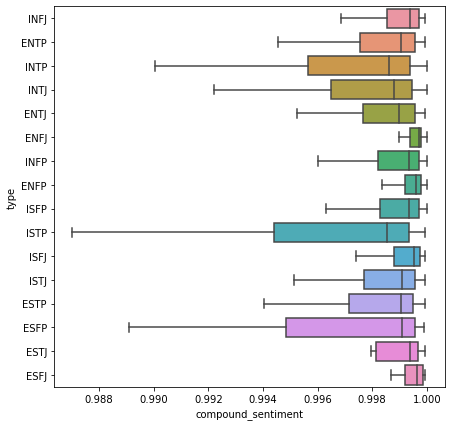

<IPython.core.display.Javascript object>

In [5]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="compound_sentiment", data=personality_data, showfliers=False)

#### Positive Sentiment Score by Type

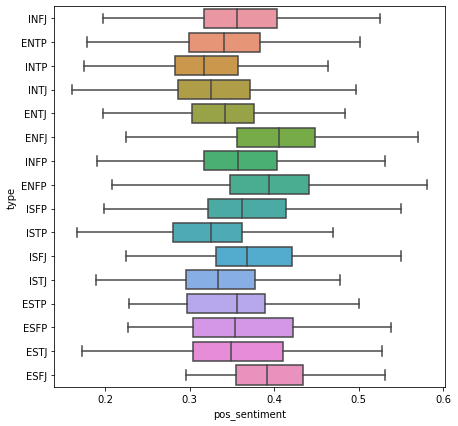

<IPython.core.display.Javascript object>

In [6]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="pos_sentiment", data=personality_data, showfliers=False)

#### Negative Sentiment Score by Type

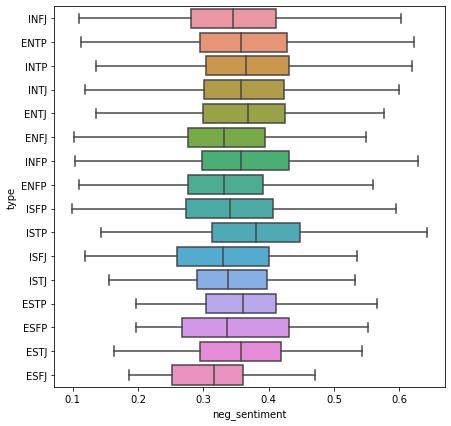

<IPython.core.display.Javascript object>

In [7]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="neg_sentiment", data=personality_data, showfliers=False)

#### Neutral Sentiment Score by Type

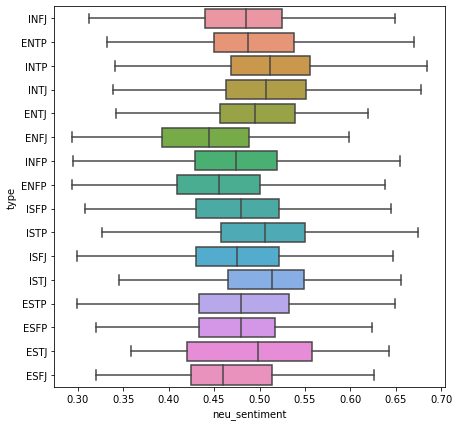

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="neu_sentiment", data=personality_data, showfliers=False)

#### Question Marks by Type

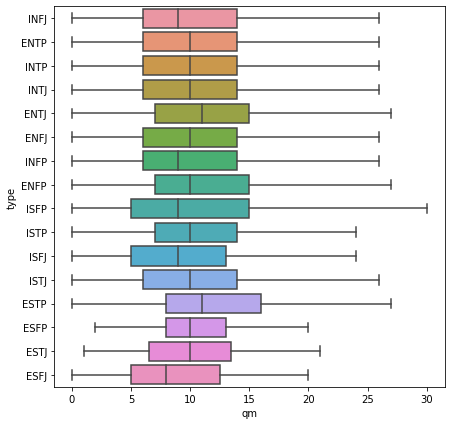

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="qm", data=personality_data, showfliers=False)

#### Exclamation by Type

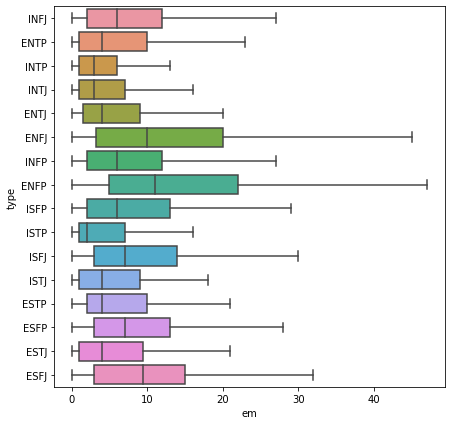

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="em", data=personality_data, showfliers=False)

#### Colons by Type

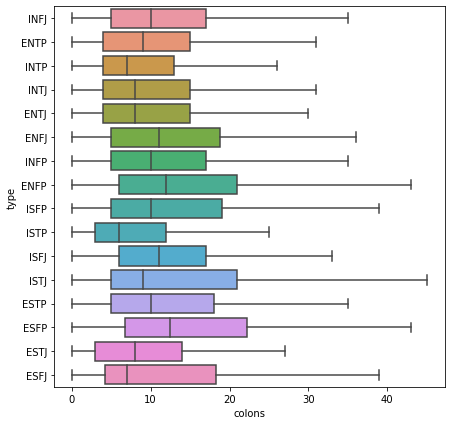

<IPython.core.display.Javascript object>

In [11]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="colons", data=personality_data, showfliers=False)

#### Emojis by Type

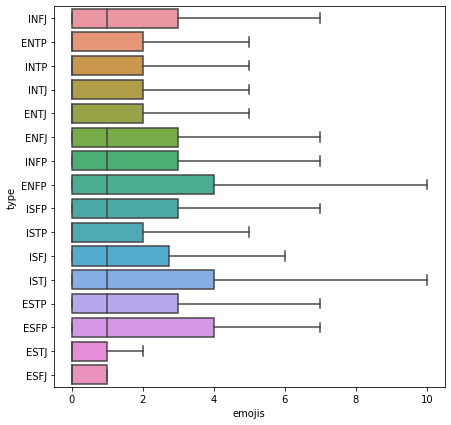

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="emojis", data=personality_data, showfliers=False)